**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Marcos Eduardo García Ortiz
*   MATRÍCULA: A01276213

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
DIR = "/content/drive/MyDrive/Maestria/Primer Trimstre/Ciencia de datos/Colab notebooks/Actividad 5"
os.chdir(DIR)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).


Del análisis con estas funciones tenemos un total de 1010 registros

150 columnas en el dataset

De estas columnas 134 son númericas flotantes, 5 de números enteros, y 11 columnas de tipo objeto es decir que conecten cadenas de texto.

In [51]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [52]:
response_df.describe(include = 'object')

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


In [53]:
response_df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.

Weight es una variable de tipo cuantitativa continua, debido a ello el gráfico que nos resulta más útil es el histograma ya que el peso puede tener valores infinitos entonces resulta más conveniente crear rangos que serán los que se representen mediante el histograma a diferencia de un gráfico de barras que trataría de crear una barra para cada uno de los registros


array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

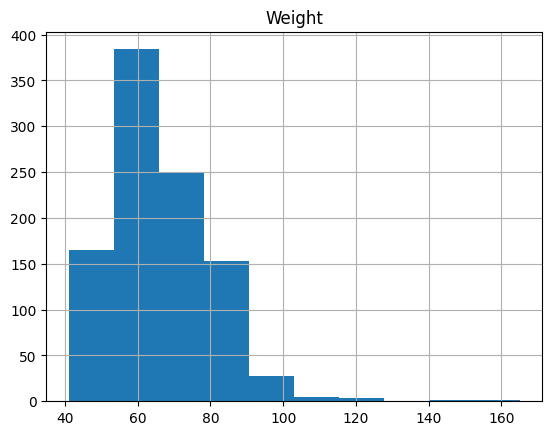

In [54]:
response_df.hist('Weight')

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

En base a la forma de la distribución del histograma y al valor positivo que nos arroja la función `skew` podemos determinar que tiene una asimetría positiva es decir que  la cola derecha es mas larga que la cola izquierda.

In [55]:
response_df['Weight'].skew()

1.2237251927527477

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [56]:
missing_porcentage = response_df['Weight'].isnull().sum()/len(response_df)*100
print(f" Porcentaje faltantes en Weight {missing_porcentage:.3f} %")

 Porcentaje faltantes en Weight 1.980 %


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [57]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    '''
    BM_MV : Boolean Masking Missing Values

    Return None
    '''
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [58]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

## Numericas

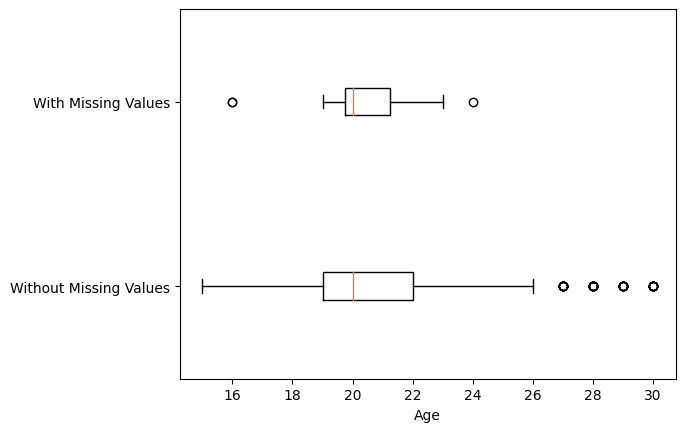

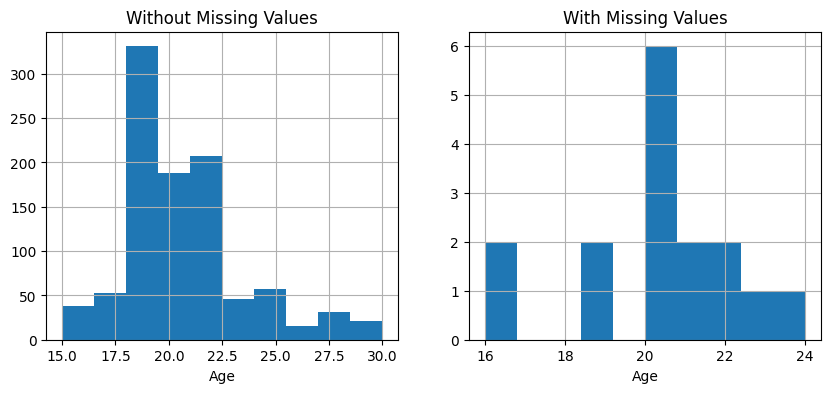

p-value of t-test: 0.7258243979822129


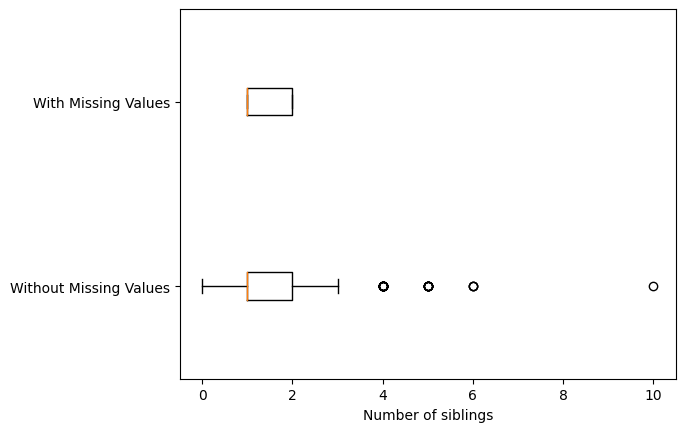

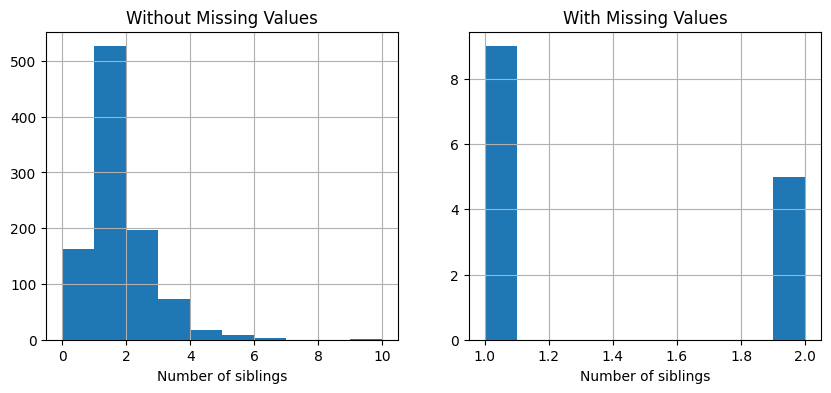

p-value of t-test: 0.8255092107556896


In [59]:
BM_MV = response_df.Weight.isna()

Diagnose_MV_Numerical(response_df, 'Age',BM_MV)
print("="*100)
Diagnose_MV_Numerical(response_df, 'Number of siblings',BM_MV)

## Categoricas

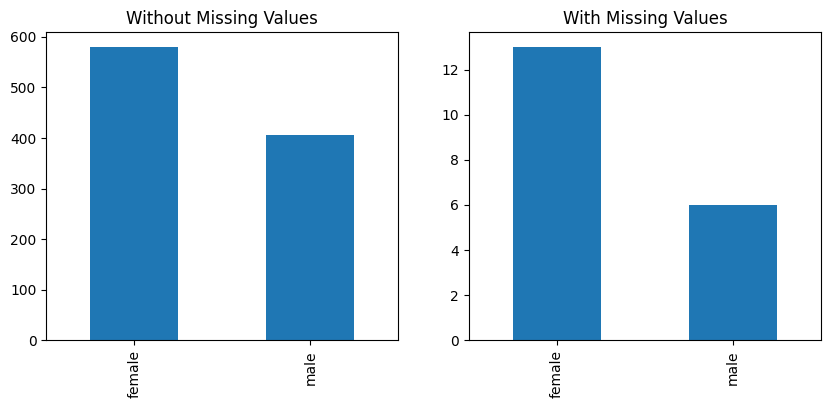

p-value of Chi_squared test: 0.5472167199163878


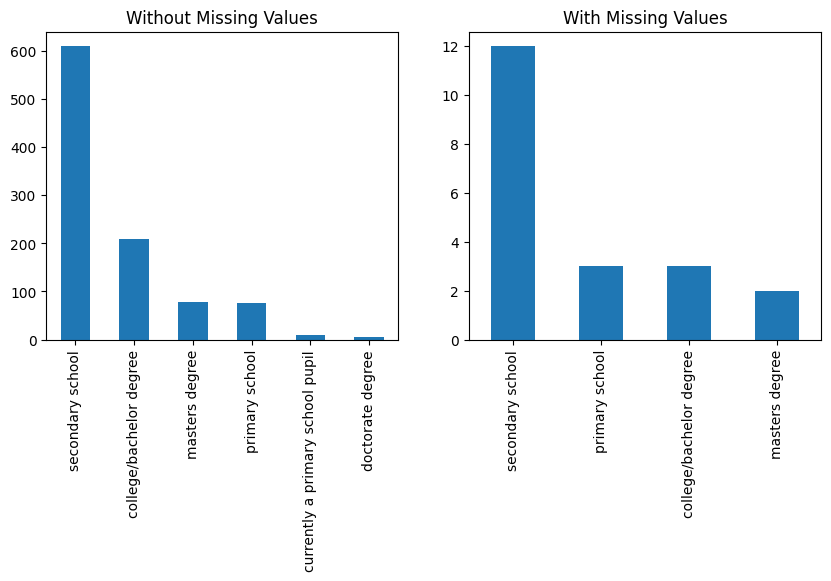

p-value of Chi_squared test: 0.8424822989541867


In [60]:
BM_MV = response_df.Weight.isna()

Diagnose_MV_Categorical(response_df, 'Gender',BM_MV)
print("="*100)
Diagnose_MV_Categorical(response_df, 'Education',BM_MV)

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [61]:
mediana_weight = response_df['Weight'].median()
response_df['Weight'].fillna(value=mediana_weight, inplace=True)

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

<Axes: >

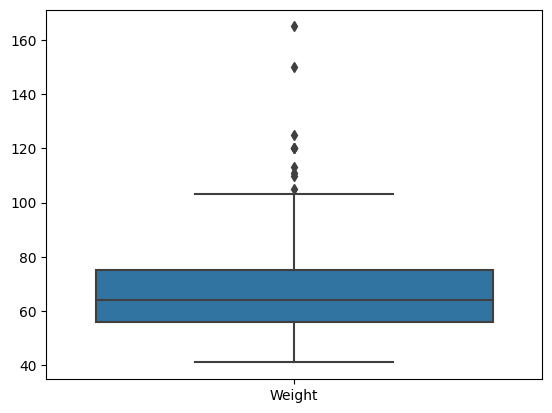

In [62]:
sns.boxplot(data=response_df[['Weight']])

In [63]:
percentile_25 = response_df["Weight"].quantile(0.25)
percentile_75 = response_df["Weight"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
outliers = response_df[(response_df["Weight"] < lower_limit) | (response_df["Weight"] > upper_limit)]
outliers

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats
998,5.0,4.0,4.0,3.0,1.0,3.0,2.0,3.0,5.0,5.0,...,28.0,192.0,105.0,1.0,male,right handed,masters degree,no,city,block of flats


In [64]:
response_df = response_df[(response_df["Weight"] > lower_limit) & (response_df["Weight"] < upper_limit)]
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


<Axes: >

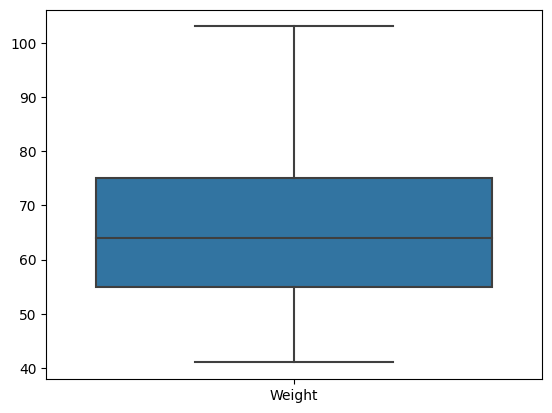

In [65]:
sns.boxplot(data=response_df[['Weight']])

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

In [66]:
missing_porcentage = response_df['Height'].isnull().sum()/len(response_df)*100
print(f" Porcentaje faltantes en Height {missing_porcentage:.3f} %")

 Porcentaje faltantes en Height 1.900 %


In [67]:
mediana_height = response_df['Height'].median()
response_df['Height'].fillna(value=mediana_height, inplace=True)

<ipython-input-67-c30e23abbc94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Height'].fillna(value=mediana_height, inplace=True)


<Axes: >

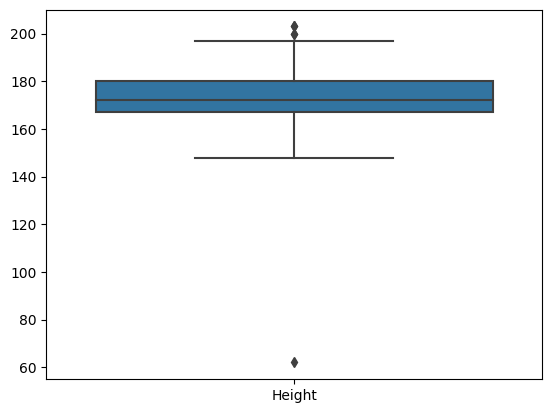

In [68]:
sns.boxplot(data=response_df[['Height']])

In [69]:
percentile_25 = response_df["Height"].quantile(0.25)
percentile_75 = response_df["Height"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
outliers = response_df[(response_df["Height"] < lower_limit) | (response_df["Height"] > upper_limit)]
outliers

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
97,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,19.0,200.0,75.0,1.0,male,right handed,primary school,no,village,block of flats
220,5.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,3.0,1.0,...,18.0,200.0,90.0,2.0,male,right handed,secondary school,no,village,house/bungalow
547,5.0,4.0,1.0,4.0,2.0,5.0,3.0,1.0,4.0,5.0,...,21.0,203.0,80.0,2.0,male,left handed,secondary school,no,village,house/bungalow
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
799,5.0,3.0,1.0,2.0,3.0,4.0,5.0,2.0,4.0,5.0,...,18.0,203.0,89.0,2.0,male,right handed,secondary school,yes,city,block of flats


In [70]:
response_df = response_df[(response_df["Height"] > lower_limit) & (response_df["Height"] < upper_limit)]
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


<Axes: >

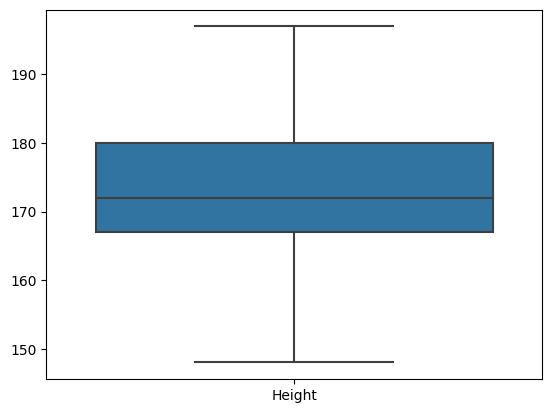

In [71]:
sns.boxplot(data=response_df[['Height']])

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [72]:
BMI = response_df['Weight'] / (response_df['Height']/100)**2
BMI

0       18.066167
1       21.829952
2       21.629649
3       19.943213
4       20.415225
          ...    
1005    21.192742
1006    23.888441
1007    25.059307
1008    19.379197
1009    21.037253
Length: 995, dtype: float64

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

<Axes: >

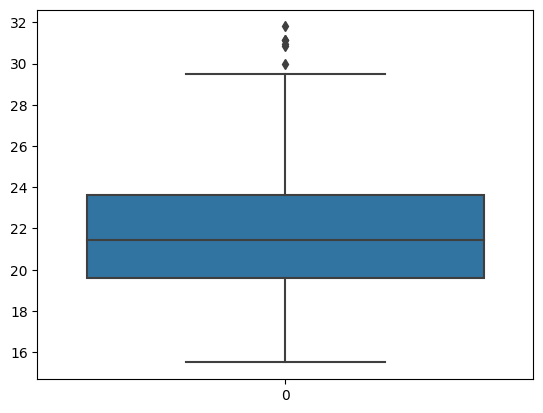

In [73]:
sns.boxplot(BMI)

<Axes: ylabel='Education'>

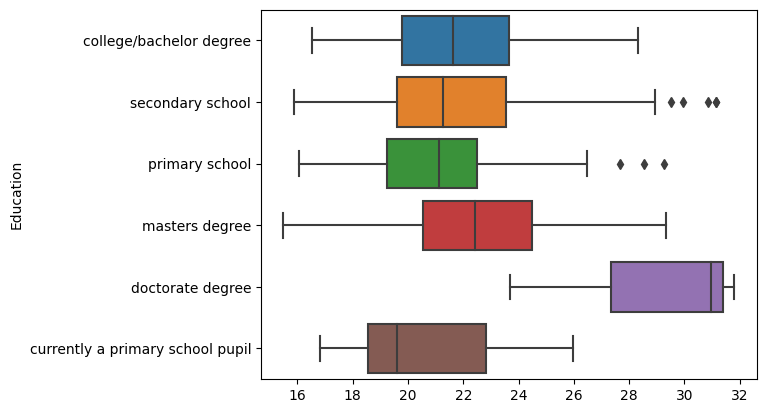

In [80]:
sns.boxplot( x=BMI, y=response_df['Education'])

<Axes: ylabel='Smoking'>

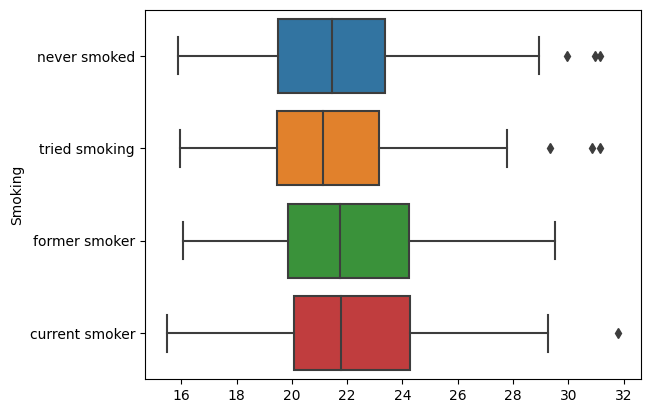

In [81]:
sns.boxplot( x=BMI, y=response_df['Smoking'])

<Axes: ylabel='Alcohol'>

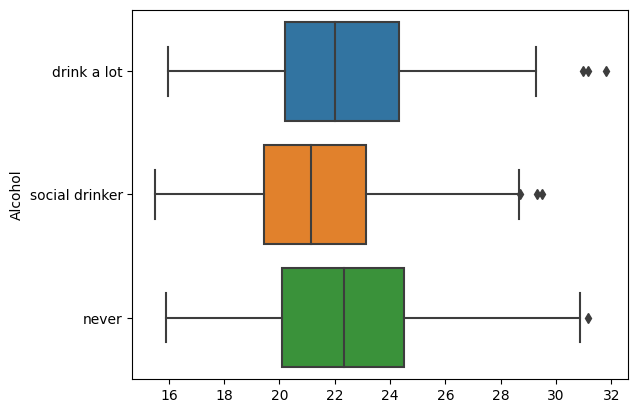

In [82]:
sns.boxplot( x=BMI, y=response_df['Alcohol'])

<Axes: ylabel='Punctuality'>

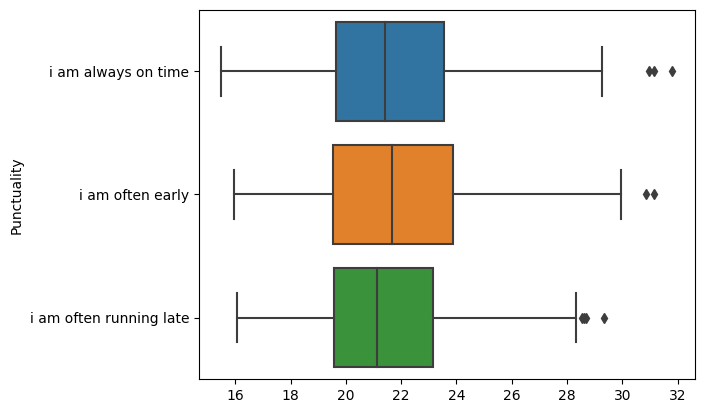

In [83]:
sns.boxplot( x=BMI, y=response_df['Punctuality'])

<Axes: ylabel='Lying'>

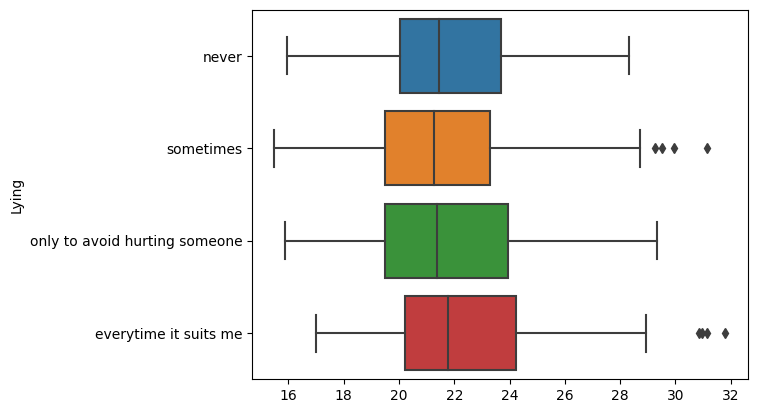

In [84]:
sns.boxplot( x=BMI, y=response_df['Lying'])

<Axes: ylabel='Internet usage'>

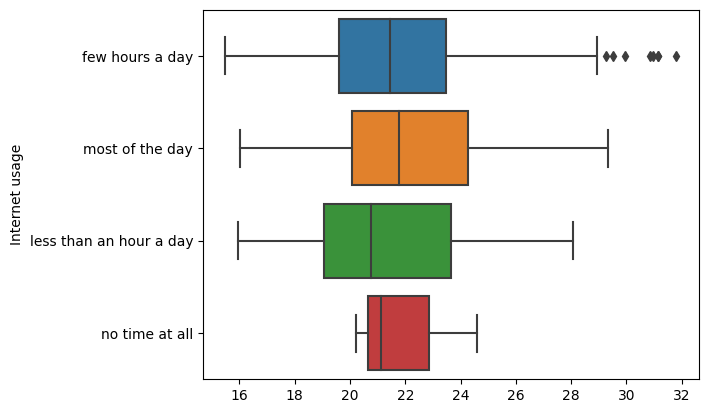

In [86]:
sns.boxplot( x=BMI, y=response_df['Internet usage'])

<Axes: ylabel='Gender'>

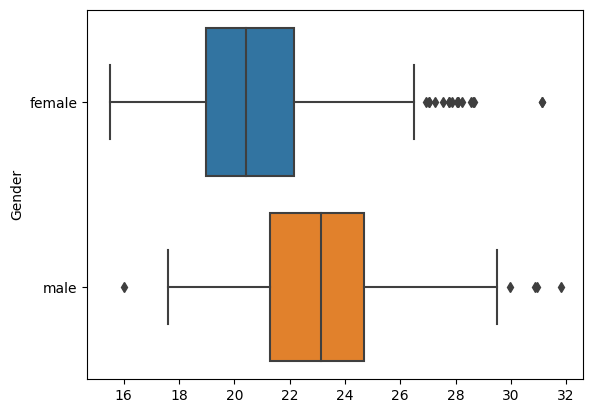

In [87]:
sns.boxplot( x=BMI, y=response_df['Gender'])

<Axes: ylabel='Left - right handed'>

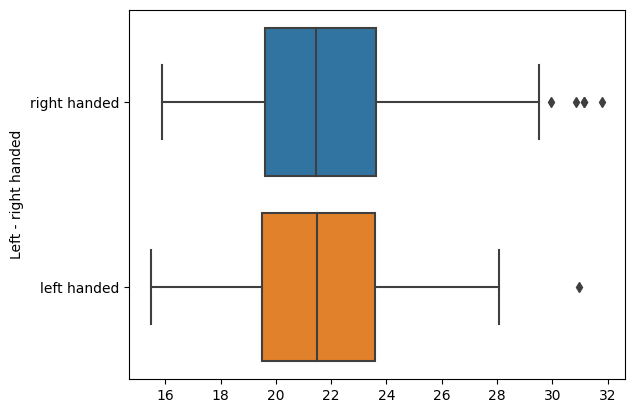

In [88]:
sns.boxplot( x=BMI, y=response_df['Left - right handed'])

<Axes: ylabel='Only child'>

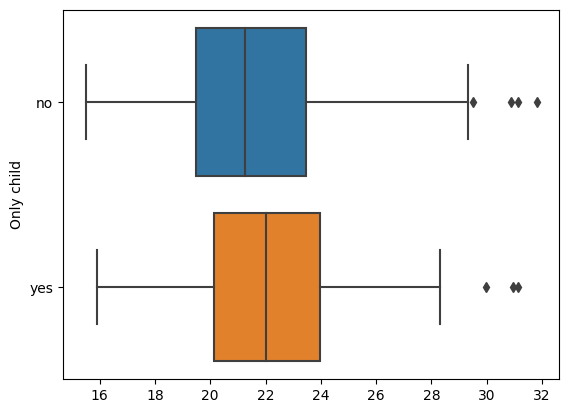

In [89]:
sns.boxplot( x=BMI, y=response_df['Only child'])

<Axes: ylabel='Village - town'>

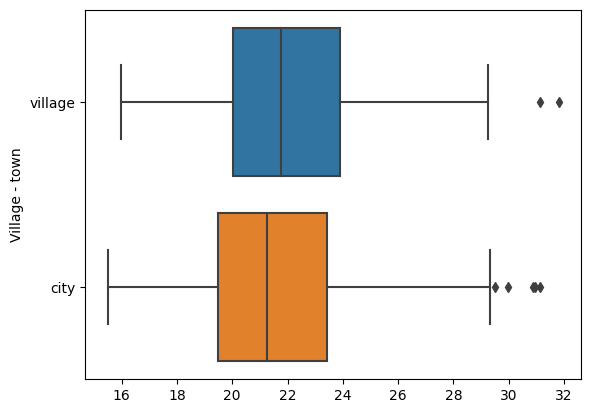

In [90]:
sns.boxplot( x=BMI, y=response_df['Village - town'])

<Axes: ylabel='House - block of flats'>

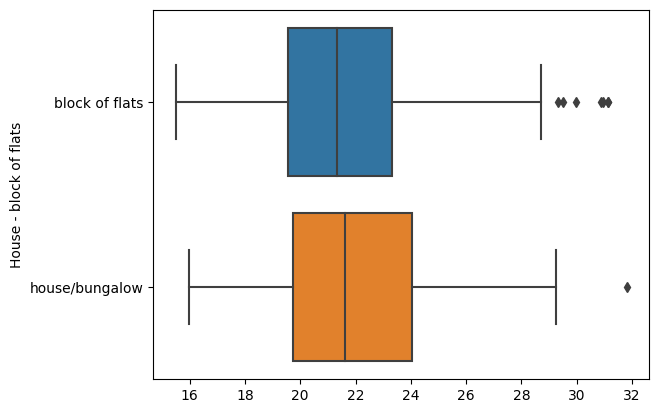

In [91]:
sns.boxplot( x=BMI, y=response_df['House - block of flats'])

## Hallazgo

De los difernetes boxplots generados uno que tiene hallazgos interesantes es el de genero donde podemos observar que los hombres tienen un mayor BMI que las mujeres lo cual toma sentido debido a que por anatomia los hombres suelen ser más corpulentos que las mujeres por lo que el valor de BMI para determinar si una persona se encuentra en su peso ideal es diferentes según el género.